In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


from matplotlib import rcParams
from matplotlib.cm import rainbow
import matplotlib.gridspec as gs
import math

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airpollution/PCA_1.csv
/kaggle/input/airpollution/withcluster.csv
/kaggle/input/airpollution/AirPollution_Cleaned.csv
/kaggle/input/uspollution/pollution_us_2000_2016.csv


In [2]:
df = pd.read_csv('../input/uspollution/pollution_us_2000_2016.csv')

## Data Cleaning and Preprocessing

In [3]:

df = df.drop(['Unnamed: 0','State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
df.head()
df.isnull().sum()

State                     0
County                    0
City                      0
Date Local                0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [4]:

df_1 = df[['State','City','Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
df_1 = df_1.dropna(axis='rows')
df_1 = df_1[df_1.State!='Country Of Mexico']  
df_1['Date Local'] = pd.to_datetime(df_1['Date Local'],format='%Y-%m-%d') 
df_1 = df_1.groupby(['State','Date Local']).mean()  
df_1_grouped = df_1.groupby(level=0)

In [5]:
df_1.columns

Index(['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI'], dtype='object')

In [6]:
df_1.head(10)

NO2 AQI  O3 AQI  SO2 AQI  CO AQI
State   Date Local                                  
Alabama 2013-12-01     37.0    24.0      1.0     6.0
        2013-12-02     30.0    12.0      3.0     6.0
        2013-12-03     21.0    11.0      3.0     3.0
        2013-12-04     18.0    13.0      1.0     2.0
        2013-12-05     15.0    13.0      1.0     2.0
        2013-12-06      9.0     6.0      0.0     2.0
        2013-12-07      8.0     9.0      0.0     2.0
        2013-12-08      9.0     0.0      4.0     3.0
        2013-12-09      8.0     7.0      0.0     3.0
        2013-12-10     26.0    19.0      1.0     3.0

In [7]:
df.head(20)

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN
5,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,1.066667,2.3,0,26.0
6,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.937500,2.6,23,NaN,0.850000,1.6,23,NaN
7,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.937500,2.6,23,NaN,1.066667,2.3,0,26.0
8,Arizona,Maricopa,Phoenix,2000-01-03,38.125000,51.0,8,48,0.007958,0.016,9,14,5.250000,11.0,19,16.0,1.929167,4.4,8,NaN
9,Arizona,Maricopa,Phoenix,2000-01-03,38.125000,51.0,8,48,0.007958,0.016,9,14,5.250000,11.0,19,16.0,1.762500,2.5,8,28.0


In [8]:
df_2 = df.dropna(axis=0)

In [9]:
df_2_dup = df_2.drop_duplicates()
data_no_duplindex_col=0

In [10]:
df_2_dup.head(20)

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
5,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,1.066667,2.3,0,26.0
9,Arizona,Maricopa,Phoenix,2000-01-03,38.125000,51.0,8,48,0.007958,0.016,9,14,5.250000,11.0,19,16.0,1.762500,2.5,8,28.0
13,Arizona,Maricopa,Phoenix,2000-01-04,40.260870,74.0,8,72,0.014167,0.033,9,28,7.083333,16.0,8,23.0,1.829167,3.0,23,34.0
17,Arizona,Maricopa,Phoenix,2000-01-05,48.450000,61.0,22,58,0.006667,0.012,9,10,8.708333,15.0,7,21.0,2.700000,3.7,2,42.0
21,Arizona,Maricopa,Phoenix,2000-01-06,39.950000,73.0,8,71,0.011750,0.025,10,21,6.761905,17.0,7,24.0,2.308333,3.6,9,41.0
25,Arizona,Maricopa,Phoenix,2000-01-07,29.625000,43.0,9,41,0.011625,0.024,10,20,8.666667,21.0,7,30.0,1.829167,3.5,23,40.0
29,Arizona,Maricopa,Phoenix,2000-01-08,29.666667,41.0,0,39,0.009750,0.020,10,17,8.250000,18.0,0,26.0,2.787500,5.1,2,57.0
33,Arizona,Maricopa,Phoenix,2000-01-09,25.083333,37.0,20,35,0.010792,0.022,10,19,6.500000,13.0,19,19.0,1.675000,2.8,2,32.0
37,Arizona,Maricopa,Phoenix,2000-01-10,37.666667,70.0,20,68,0.008458,0.015,9,13,9.958333,21.0,20,30.0,2.179167,3.7,23,42.0


In [11]:
df_2_dup.isnull().sum()

State                0
County               0
City                 0
Date Local           0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64

In [12]:
df_2_dup.to_csv('AirPollution_Cleaned.csv')

In [13]:
df_fin_1 = df_2_dup[['State','City','County','Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
df_fin_1 = df_fin_1.dropna(axis='rows')
df_fin_1 = df_fin_1[df_fin_1.State!='Country Of Mexico'] 

In [14]:
df_fin_1.head()

,State,City,County,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
1,Arizona,Phoenix,Maricopa,2000-01-01,46,34,13.0,25.0
5,Arizona,Phoenix,Maricopa,2000-01-02,34,27,4.0,26.0
9,Arizona,Phoenix,Maricopa,2000-01-03,48,14,16.0,28.0
13,Arizona,Phoenix,Maricopa,2000-01-04,72,28,23.0,34.0
17,Arizona,Phoenix,Maricopa,2000-01-05,58,10,21.0,42.0


In [15]:
df_fin_1['Date Local'] = pd.to_datetime(df_fin_1['Date Local'],format='%Y-%m-%d') 

In [16]:
df_fin_1['State'].unique()

array(['Arizona', 'California', 'Colorado', 'District Of Columbia',
       'Florida', 'Illinois', 'Indiana', 'Kansas', 'Kentucky',
       'Louisiana', 'Michigan', 'Missouri', 'New Jersey', 'New York',
       'North Carolina', 'Oklahoma', 'Pennsylvania', 'Texas', 'Virginia',
       'Massachusetts', 'Nevada', 'New Hampshire', 'Tennessee',
       'South Carolina', 'Connecticut', 'Iowa', 'Maine', 'Maryland',
       'Wisconsin', 'Arkansas', 'Oregon', 'Wyoming', 'North Dakota',
       'Idaho', 'Ohio', 'Georgia', 'Delaware', 'Hawaii', 'Minnesota',
       'New Mexico', 'Rhode Island', 'South Dakota', 'Utah', 'Alabama',
       'Washington', 'Alaska'], dtype=object)

In [17]:
df_fin_1['City'].unique()

array(['Phoenix', 'Scottsdale', 'Tucson', 'Concord', 'Bethel Island',
       'San Pablo', 'Pittsburg', 'Calexico', 'Bakersfield', 'Burbank',
       'Los Angeles', 'Long Beach', 'Hawthorne', 'Costa Mesa', 'Rubidoux',
       'Not in a city', 'Arden-Arcade', 'Victorville', 'Chula Vista',
       'San Diego', 'San Francisco', 'Capitan', 'Lompoc', 'Goleta',
       'Vandenberg Air Force Base', 'Davenport', 'Vallejo', 'Welby',
       'Washington', 'Winter Park', 'Chicago', 'Cicero',
       'Calumet City (PU RR name Calumet Park (sta.))',
       'Indianapolis (Remainder)', 'Kansas City', 'Ashland',
       'Lexington-Fayette (corporate name for Lexington)', 'Henderson',
       'Louisville', 'Paducah', 'Baton Rouge', 'Detroit', 'Sunset Hills',
       'Ladue', 'Ferguson', 'St. Ann', 'St. Louis', 'Camden', 'New York',
       'Holtsville', 'Winston-Salem', 'Charlotte', 'Park Hill',
       'Ponca City', 'Pittsburgh', 'Beaver Falls', 'Reading', 'Altoona',
       'Bristol', 'Johnstown', 'Scranton', 'La

## Descriptive Statistics

In [18]:
# sorted_df_fin = df_fin_1.sort_values(["O3 AQI"], ascending=False)
# color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]

# fig= plt.figure(figsize=(15,8))
# g=gs.GridSpec(ncols=1, nrows=2, figure=fig)
# plt.suptitle("Top 10 and Bottom 10 cities in O3 Air Quality Index", weight='bold', size=20)
# ax1=plt.subplot(g[0,0])

# top_10=sorted_df_fin.head(10)
# bot_10= sorted_df_fin.tail(10)
# ax1=sns.barplot(data=top_10, x=top_10['O3 AQI'],y=top_10['City'], color=color[4])
# #ax1.set_xlabel('')
# ax1.xaxis.set_visible(False)
# ax1.annotate("Top 10 cities in O3 Air Quality Index",xy=(220,7), weight='bold', size=12)
# ax2=plt.subplot(g[1,0], sharex=ax1)
# ax2=sns.barplot(data=bot_10, x=bot_10['O3 AQI'],y=bot_10['City'], color=color[3])
# ax2.annotate("Bottom 10 cities in O3 Air Quality Index",xy=(220,7), weight='bold', size=12)
# for s in ['left','right','top','bottom']:
#     ax1.spines[s].set_visible(False)
#     ax2.spines[s].set_visible(False)

## Running Queries on Pandas Dataframe

In [19]:

import pandasql as ps
from pandasql import sqldf
# ps.sqldf("select State, City from sorted_df_fin")


In [20]:
pysqldf = lambda q: sqldf(q, globals())

In [21]:
df_fin_1.head(10)

,State,City,County,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
1,Arizona,Phoenix,Maricopa,2000-01-01,46,34,13.0,25.0
5,Arizona,Phoenix,Maricopa,2000-01-02,34,27,4.0,26.0
9,Arizona,Phoenix,Maricopa,2000-01-03,48,14,16.0,28.0
13,Arizona,Phoenix,Maricopa,2000-01-04,72,28,23.0,34.0
17,Arizona,Phoenix,Maricopa,2000-01-05,58,10,21.0,42.0
21,Arizona,Phoenix,Maricopa,2000-01-06,71,21,24.0,41.0
25,Arizona,Phoenix,Maricopa,2000-01-07,41,20,30.0,40.0
29,Arizona,Phoenix,Maricopa,2000-01-08,39,17,26.0,57.0
33,Arizona,Phoenix,Maricopa,2000-01-09,35,19,19.0,32.0
37,Arizona,Phoenix,Maricopa,2000-01-10,68,13,30.0,42.0


In [22]:
q = """SELECT  distinct(City),State
       FROM df_fin_1
       WHERE City = 'York'
       
       --LIMIT 10;"""

trial = pysqldf(q)
trial

,City,State
0,York,Pennsylvania


## Pandas Profiling


In [23]:
# pip install pandas-profiling

In [24]:
# from pandas_profiling import ProfileReport
# ProfileReport(df)

In [25]:
# data_profile = ProfileReport(df)
# data_profile.to_file('Data_Mining_US_Air_pollution.html')

In [26]:
# data_profile = ProfileReport(df_fin_1)
# data_profile.to_file('Data_Mining_After removing duplicates.html')

## Dimensionality Reduction using PCA

In [27]:
df_2_dup

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
5,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,1.066667,2.3,0,26.0
9,Arizona,Maricopa,Phoenix,2000-01-03,38.125000,51.0,8,48,0.007958,0.016,9,14,5.250000,11.0,19,16.0,1.762500,2.5,8,28.0
13,Arizona,Maricopa,Phoenix,2000-01-04,40.260870,74.0,8,72,0.014167,0.033,9,28,7.083333,16.0,8,23.0,1.829167,3.0,23,34.0
17,Arizona,Maricopa,Phoenix,2000-01-05,48.450000,61.0,22,58,0.006667,0.012,9,10,8.708333,15.0,7,21.0,2.700000,3.7,2,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746642,Wyoming,Laramie,Not in a city,2016-03-27,4.277273,23.5,23,22,0.041958,0.050,10,46,-0.095238,0.0,0,0.0,0.100000,0.1,0,1.0
1746646,Wyoming,Laramie,Not in a city,2016-03-28,8.317391,22.6,6,21,0.041292,0.052,9,48,0.117391,0.5,7,0.0,0.100000,0.1,0,1.0
1746650,Wyoming,Laramie,Not in a city,2016-03-29,2.564706,3.6,6,3,0.028000,0.040,23,37,0.143750,0.7,8,0.0,0.006667,0.1,0,1.0
1746654,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.016667,0.1,0,0.0,0.091667,0.1,2,1.0


In [28]:
df_not_scaled = df_2_dup.drop(['State','County','City','Date Local'],axis=1)
df_not_scaled

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
1,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
5,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,1.066667,2.3,0,26.0
9,38.125000,51.0,8,48,0.007958,0.016,9,14,5.250000,11.0,19,16.0,1.762500,2.5,8,28.0
13,40.260870,74.0,8,72,0.014167,0.033,9,28,7.083333,16.0,8,23.0,1.829167,3.0,23,34.0
17,48.450000,61.0,22,58,0.006667,0.012,9,10,8.708333,15.0,7,21.0,2.700000,3.7,2,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746642,4.277273,23.5,23,22,0.041958,0.050,10,46,-0.095238,0.0,0,0.0,0.100000,0.1,0,1.0
1746646,8.317391,22.6,6,21,0.041292,0.052,9,48,0.117391,0.5,7,0.0,0.100000,0.1,0,1.0
1746650,2.564706,3.6,6,3,0.028000,0.040,23,37,0.143750,0.7,8,0.0,0.006667,0.1,0,1.0
1746654,1.083333,1.6,9,1,0.043917,0.048,18,44,0.016667,0.1,0,0.0,0.091667,0.1,2,1.0


In [29]:
from sklearn.preprocessing import StandardScaler,normalize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_not_scaled.values)

In [30]:
normalized_df = normalize(scaled_data)
normalized_df = pd.DataFrame(normalized_df) 

In [31]:
normalized_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.106126,0.239268,0.149854,0.236621,-0.051669,0.008518,-0.006809,-0.016729,0.065559,0.067832,0.291538,0.079850,0.261223,0.531764,0.346660,0.527751
1,0.173502,0.107722,0.150312,0.108489,-0.182528,-0.076400,-0.006829,-0.074511,0.004404,-0.041030,0.316372,-0.042572,0.358637,0.565320,-0.129880,0.557221
2,0.313976,0.188720,-0.055860,0.187611,-0.188551,-0.178527,-0.034438,-0.131728,0.143731,0.075673,0.177264,0.087696,0.519558,0.456069,0.026270,0.444293
3,0.277122,0.291675,-0.045466,0.304745,-0.100995,-0.038810,-0.028030,-0.039094,0.180694,0.115215,-0.011101,0.127666,0.443119,0.465386,0.205148,0.460218
4,0.284408,0.168853,0.099009,0.170764,-0.129919,-0.134652,-0.022154,-0.100124,0.187450,0.082588,-0.019938,0.088194,0.559232,0.472053,-0.041198,0.467661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435546,-0.267737,-0.035627,0.426362,-0.037271,0.415168,0.209936,-0.012497,0.150398,-0.213283,-0.174877,-0.384928,-0.177669,-0.254140,-0.250884,-0.237671,-0.254627
435547,-0.171077,-0.063483,-0.262573,-0.068980,0.481969,0.301506,-0.105358,0.218840,-0.230695,-0.191770,-0.094820,-0.215309,-0.307981,-0.304036,-0.288024,-0.308571
435548,-0.240125,-0.303466,-0.161886,-0.306793,0.036848,0.011681,0.713716,0.010886,-0.140109,-0.113262,-0.025726,-0.132746,-0.255557,-0.187449,-0.177577,-0.190245
435549,-0.289105,-0.348538,-0.081116,-0.353657,0.366704,0.134474,0.458298,0.094494,-0.158170,-0.134847,-0.302573,-0.139657,-0.205936,-0.197208,-0.127083,-0.200149


#### PCA

In [32]:

from sklearn.decomposition import PCA



In [33]:
sklearn_pca = PCA(n_components=2)
reduced_data = sklearn_pca.fit_transform(normalized_df)

principal_df = pd.DataFrame(reduced_data)

print(df_2_dup.shape)
print(reduced_data.shape)

(435551, 20)
(435551, 2)


In [34]:
principal_df.head(2)

,0,1
0,0.896362,0.137317
1,0.760269,-0.049627


In [35]:
sum(sklearn_pca.explained_variance_ratio_)

0.46130858618197734

In [36]:
sklearn_pca = PCA(n_components=10)
reduced_data = sklearn_pca.fit_transform(scaled_data)

print(df_2_dup.shape)
print(reduced_data.shape)


(435551, 20)
(435551, 10)


In [37]:
# reduced_data.head(2)

In [38]:
sum(sklearn_pca.explained_variance_ratio_)

0.9856943615639648

In [39]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=252cf032388dcabf714cb179b3bdea5de1015de63da341d4ed9d279cafc4d8e0
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [40]:
# Import libraries
import numpy as np
import pandas as pd
from pca import pca

model = pca(n_components=3)
# Fit transform
out = model.fit_transform(scaled_data)

# Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])


[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
     PC feature   loading  type
0   PC1       1  0.378482  best
1   PC2       6  0.462799  best
2   PC3      10  0.407879  best
3   PC1       2  0.360053  weak
4   PC1       3  0.074640  weak
5   PC1       4  0.361010  weak
6   PC2       5  0.390908  weak
7   PC2       7  0.060584  weak
8   PC2       8  0.456581  weak
9   PC3       9  0.365497  weak
10  PC3      11  0.114329  weak
11  PC3      12  0.403118  weak
12  PC1      13  0.345152  weak
13  PC1      14  0.359243  weak
14  PC1      15  0.139283  weak
15  PC1      16  0.360868  weak


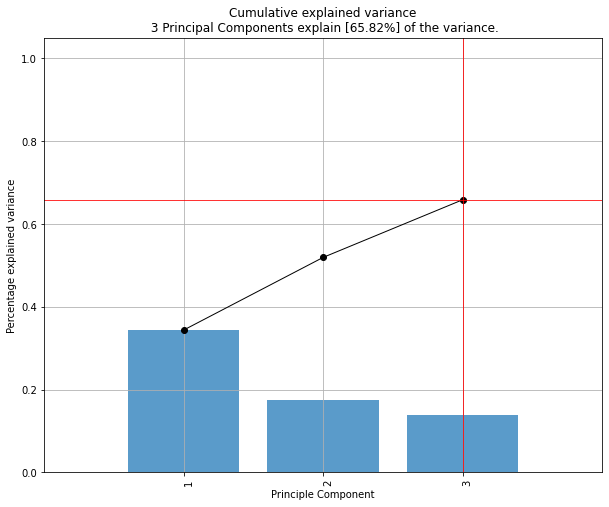

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 3 Principal Components explain [65.82%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [41]:
model.plot()

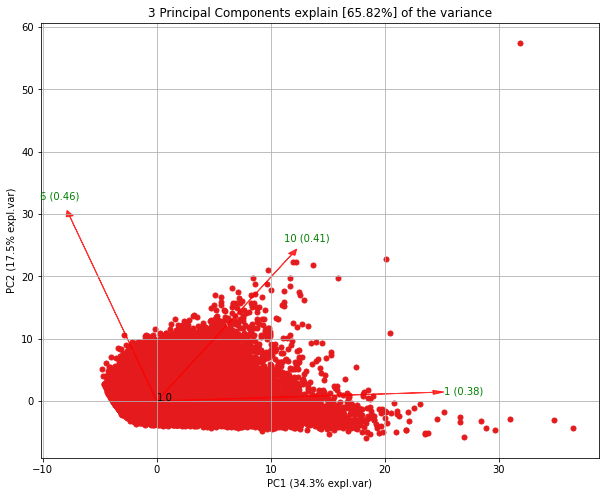

In [42]:
ax = model.biplot(n_feat=3, legend=False)

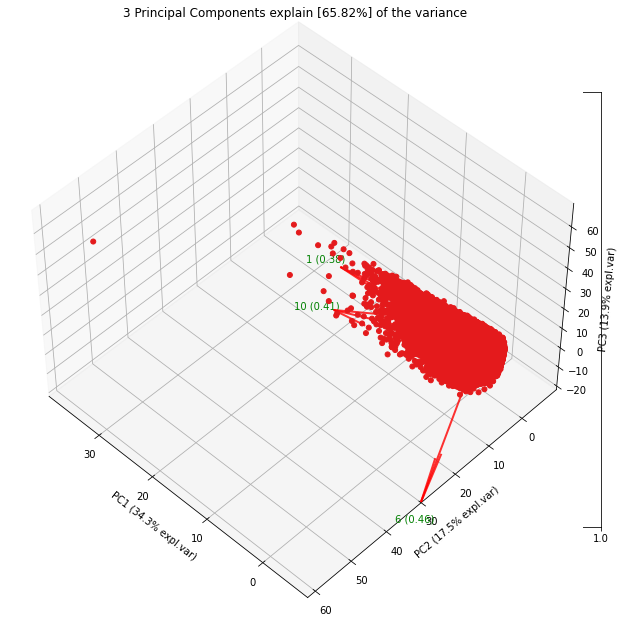

In [43]:
ax = model.biplot3d(n_feat=3, legend=False)


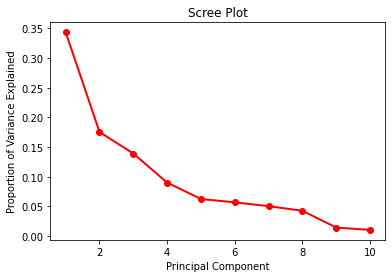

In [44]:
PC_values = np.arange(sklearn_pca.n_components_) + 1
plt.plot(PC_values, sklearn_pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [45]:
scaled_df = pd.DataFrame(scaled_data)
scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.653825,1.474094,0.923227,1.457790,-0.318328,0.052476,-0.041947,-0.103063,0.403898,0.417901,1.796124,0.491942,1.609360,3.276123,2.135722,3.251398
1,1.065662,0.661633,0.923227,0.666346,-1.121101,-0.469256,-0.041947,-0.457652,0.027051,-0.252011,1.943177,-0.261483,2.202771,3.472228,-0.797733,3.422483
2,2.660432,1.599088,-0.473325,1.589697,-1.597662,-1.512721,-0.291808,-1.116175,1.217887,0.641205,1.502018,0.743083,4.402403,3.864438,0.222599,3.764653
3,2.885018,3.036520,-0.473325,3.172584,-1.051424,-0.404040,-0.291808,-0.406997,1.881138,1.199465,-0.115568,1.329080,4.613147,4.844962,2.135722,4.791163
4,3.746103,2.224059,1.304105,2.249233,-1.711237,-1.773588,-0.291808,-1.318797,2.469019,1.087813,-0.262621,1.161652,7.365981,6.217697,-0.542650,6.159843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435546,-0.898646,-0.119580,1.431064,-0.125097,1.393491,0.704642,-0.041947,0.504804,-0.715875,-0.586967,-1.291994,-0.596338,-0.853008,-0.842081,-0.797733,-0.854643
435547,-0.473829,-0.175827,-0.727244,-0.191051,1.334899,0.835075,-0.291808,0.606115,-0.638952,-0.531141,-0.262621,-0.596338,-0.853008,-0.842081,-0.797733,-0.854643
435548,-1.078722,-1.363271,-0.727244,-1.378217,0.165535,0.052476,3.206249,0.048904,-0.629416,-0.508811,-0.115568,-0.596338,-1.148048,-0.842081,-0.797733,-0.854643
435549,-1.234488,-1.488265,-0.346366,-1.510124,1.565834,0.574209,1.956943,0.403493,-0.675391,-0.575802,-1.291994,-0.596338,-0.879350,-0.842081,-0.542650,-0.854643


## PCA_2

In [46]:
df_not_scaled.to_csv('PCA_1.csv')

In [47]:
pca_bf = pd.read_csv('../input/airpollution/PCA_1.csv')
pca_bf = pca_bf.drop('Unnamed: 0',axis=1)


In [48]:
pca_bf

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,NO2 Health,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,19.041667,49.0,19,46,Good,0.022500,0.040,10,34,3.000000,9.0,21,13,0.878947,2.2,23,25
1,22.958333,36.0,19,34,Good,0.013375,0.032,10,27,1.958333,3.0,22,4,1.066667,2.3,0,26
2,38.125000,51.0,8,48,Good,0.007958,0.016,9,14,5.250000,11.0,19,16,1.762500,2.5,8,28
3,40.260870,74.0,8,72,Moderate,0.014167,0.033,9,28,7.083333,16.0,8,23,1.829167,3.0,23,34
4,48.450000,61.0,22,58,Moderate,0.006667,0.012,9,10,8.708333,15.0,7,21,2.700000,3.7,2,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435546,4.277273,23.5,23,22,Good,0.041958,0.050,10,46,-0.095238,0.0,0,0,0.100000,0.1,0,1
435547,8.317391,22.6,6,21,Good,0.041292,0.052,9,48,0.117391,0.5,7,0,0.100000,0.1,0,1
435548,2.564706,3.6,6,3,Good,0.028000,0.040,23,37,0.143750,0.7,8,0,0.006667,0.1,0,1
435549,1.083333,1.6,9,1,Good,0.043917,0.048,18,44,0.016667,0.1,0,0,0.091667,0.1,2,1


In [49]:
withoutNO2= pca_bf.drop('NO2 Health',axis=1)
withoutNO2.head(2)

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13,0.878947,2.2,23,25
1,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4,1.066667,2.3,0,26


In [50]:
scaler = StandardScaler()

scaled=withoutNO2.copy()
scaled=pd.DataFrame(scaler.fit_transform(scaled), columns=withoutNO2.columns)
scaled.head()

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0.653825,1.474094,0.923227,1.457790,-0.318328,0.052476,-0.041947,-0.103063,0.403898,0.417901,1.796124,0.491942,1.609360,3.276123,2.135722,3.251398
1,1.065662,0.661633,0.923227,0.666346,-1.121101,-0.469256,-0.041947,-0.457652,0.027051,-0.252011,1.943177,-0.261483,2.202771,3.472228,-0.797733,3.422483
2,2.660432,1.599088,-0.473325,1.589697,-1.597662,-1.512721,-0.291808,-1.116175,1.217887,0.641205,1.502018,0.743083,4.402403,3.864438,0.222599,3.764653
3,2.885018,3.036520,-0.473325,3.172584,-1.051424,-0.404040,-0.291808,-0.406997,1.881138,1.199465,-0.115568,1.329080,4.613147,4.844962,2.135722,4.791163
4,3.746103,2.224059,1.304105,2.249233,-1.711237,-1.773588,-0.291808,-1.318797,2.469019,1.087813,-0.262621,1.161652,7.365981,6.217697,-0.542650,6.159843


In [51]:
pca = PCA(n_components=6)
Principal_components=pca.fit_transform(scaled)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6'])
print(pca_df)

             PC 1      PC 2      PC 3      PC 4      PC 5      PC 6
0        5.041018 -0.115252 -1.321385 -1.078659  1.023960  2.137393
1        4.488757 -1.526030 -1.505715  0.694207  1.343539  2.886712
2        7.688559 -1.432668 -0.757969  1.727721  1.433314  2.012741
3        9.834859  0.144451 -1.991798  1.264034  1.520379  0.386707
4       11.686581 -1.644609 -1.763058  3.237379  3.079323  1.889281
...           ...       ...       ...       ...       ...       ...
435546  -2.251871  0.444254 -0.959346 -0.627473  0.011426 -0.964520
435547  -2.205317  0.781910 -1.012474  0.158334 -0.087393 -0.505816
435548  -2.959014 -0.261994  0.206091  1.501532 -2.522493  1.235637
435549  -3.478215  0.409215 -0.582850  1.286361 -1.056225  0.221299
435550  -3.583105  0.326638 -0.556583  1.111676  0.746790 -0.505024

[435551 rows x 6 columns]


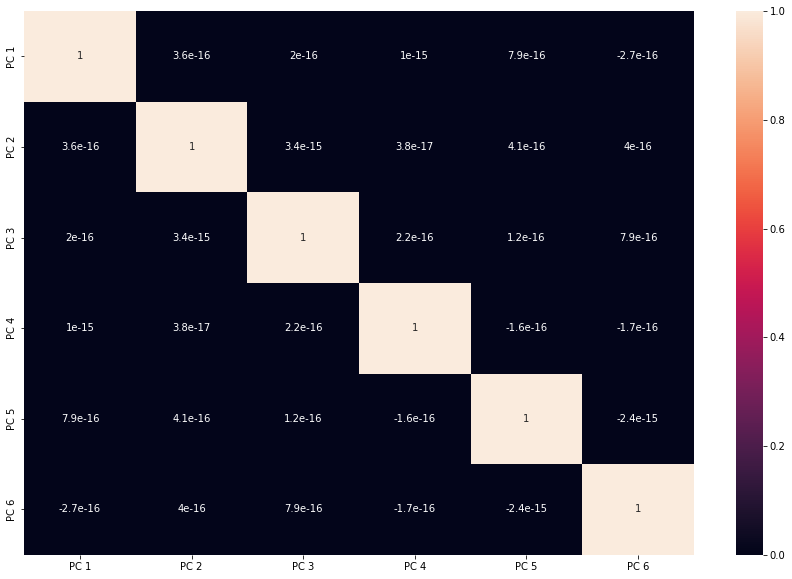

In [52]:
import seaborn as sns
corrmat = pca_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(pca_df[top_corr_features].corr(),annot=True)

In [53]:
for_visual = pd.concat([pca_df, pca_bf['NO2 Health']], axis = 1)
print(for_visual)

             PC 1      PC 2      PC 3      PC 4      PC 5      PC 6 NO2 Health
0        5.041018 -0.115252 -1.321385 -1.078659  1.023960  2.137393       Good
1        4.488757 -1.526030 -1.505715  0.694207  1.343539  2.886712       Good
2        7.688559 -1.432668 -0.757969  1.727721  1.433314  2.012741       Good
3        9.834859  0.144451 -1.991798  1.264034  1.520379  0.386707   Moderate
4       11.686581 -1.644609 -1.763058  3.237379  3.079323  1.889281   Moderate
...           ...       ...       ...       ...       ...       ...        ...
435546  -2.251871  0.444254 -0.959346 -0.627473  0.011426 -0.964520       Good
435547  -2.205317  0.781910 -1.012474  0.158334 -0.087393 -0.505816       Good
435548  -2.959014 -0.261994  0.206091  1.501532 -2.522493  1.235637       Good
435549  -3.478215  0.409215 -0.582850  1.286361 -1.056225  0.221299       Good
435550  -3.583105  0.326638 -0.556583  1.111676  0.746790 -0.505024       Good

[435551 rows x 7 columns]


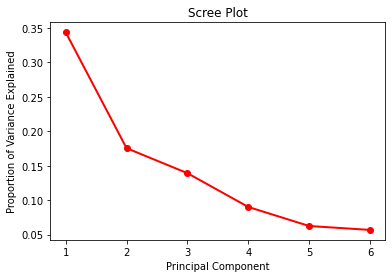

In [54]:


PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [55]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.34364095 0.17545448 0.13916277 0.09015489 0.06253662 0.05686232]
Cumulative Prop. Variance Explained:  [0.34364095 0.51909543 0.6582582  0.74841309 0.81094971 0.86781203]


In [56]:
print(pca.explained_variance_) 


[5.4982678  2.80727819 2.22660944 1.44248153 1.00058825 0.90979921]


In [57]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=scaled.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
NO2 Mean,0.378482,0.021925,-0.102948,-0.062596,-0.197050,-0.201378
NO2 1st Max Value,0.360053,0.088644,-0.171693,-0.159361,-0.232964,-0.238830
NO2 1st Max Hour,0.074640,-0.073202,0.066290,-0.573308,0.087274,0.090413
NO2 AQI,0.361010,0.089770,-0.170985,-0.157022,-0.230406,-0.238676
O3 Mean,-0.226735,0.390908,-0.275917,0.023156,0.115453,0.070507
O3 1st Max Value,-0.119319,0.462799,-0.351720,-0.090296,0.046817,0.020865
O3 1st Max Hour,0.001772,0.060584,-0.037606,0.271846,-0.808762,0.318881
O3 AQI,-0.092280,0.456581,-0.350538,-0.093965,0.047416,0.022669
SO2 Mean,0.206588,0.320085,0.365497,0.092885,0.061747,-0.036217
SO2 1st Max Value,0.184841,0.367272,0.407879,0.084596,0.070182,-0.007342


## KMeans Clustering

In [58]:
X= normalized_df.iloc[:, [7,11]].values
# X= principal_df.values

In [59]:
from sklearn.cluster import KMeans
L=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=5)
    kmeans.fit(X)
    L.append(kmeans.inertia_)


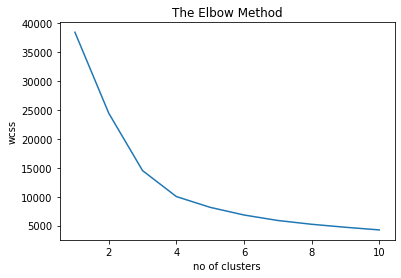

In [60]:
plt.plot(range(1,11), L)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [61]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=5)
y_kmeans= kmeansmodel.fit_predict(X)

In [62]:
kmeans.cluster_centers_

array([[-0.26522517, -0.14768083],
       [ 0.23064791, -0.13720945],
       [-0.14475427,  0.27984332],
       [ 0.04995248, -0.17091337],
       [-0.10690894, -0.16429024],
       [ 0.58651205, -0.03411054],
       [ 0.2860004 ,  0.27553524],
       [ 0.00620146,  0.51947575],
       [-0.19478659,  0.03030505],
       [ 0.04196138,  0.04550733]])

In [63]:
kmeans.cluster_centers_[0:3,0]

array([-0.26522517,  0.23064791, -0.14475427])

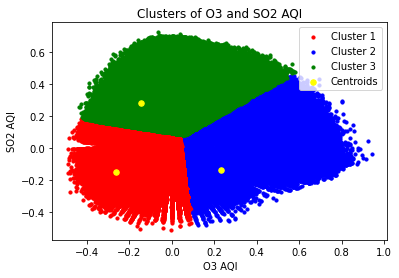

In [64]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'orange', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[0:3, 0], kmeans.cluster_centers_[0:3, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of O3 and SO2 AQI')
plt.xlabel('O3 AQI')
plt.ylabel('SO2 AQI')
plt.legend()
plt.show()

## Pattern Mining

**State with highiest average pollutant values**

In [65]:
df = pd.read_csv('../input/uspollution/pollution_us_2000_2016.csv')


In [66]:
df.head(10)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN
5,5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,1.066667,2.3,0,26.0
6,6,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.937500,2.6,23,NaN,Parts per million,0.850000,1.6,23,NaN
7,7,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.937500,2.6,23,NaN,Parts per million,1.066667,2.3,0,26.0
8,8,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,...,Parts per billion,5.250000,11.0,19,16.0,Parts per million,1.929167,4.4,8,NaN
9,9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,...,Parts per billion,5.250000,11.0,19,16.0,Parts per million,1.762500,2.5,8,28.0


In [67]:
df = df.drop('Unnamed: 0',axis=1)
# df.reset_index(inplace=True)
df.head(10)

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN
5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,1.066667,2.3,0,26.0
6,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.937500,2.6,23,NaN,Parts per million,0.850000,1.6,23,NaN
7,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.937500,2.6,23,NaN,Parts per million,1.066667,2.3,0,26.0
8,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,38.125000,...,Parts per billion,5.250000,11.0,19,16.0,Parts per million,1.929167,4.4,8,NaN
9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,38.125000,...,Parts per billion,5.250000,11.0,19,16.0,Parts per million,1.762500,2.5,8,28.0


In [68]:
AQI_df = df[['State','Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
AQI_df = AQI_df[AQI_df.State!='Country Of Mexico']  
AQI_df
state_aqi_df = AQI_df.groupby('State').mean()
state_aqi_df.reset_index(inplace=True)
state_aqi_df

,State,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,Alabama,21.232246,36.845170,7.005115,3.850288
1,Alaska,19.553191,17.725431,14.487335,6.528340
2,Arizona,36.106987,39.004095,4.213486,9.191023
3,Arkansas,21.486471,35.035662,2.975773,5.929914
4,California,24.110238,35.722673,3.598278,7.405669
5,Colorado,35.958878,34.673582,10.605523,7.724205
6,Connecticut,18.457355,37.149400,3.221925,3.586407
7,Delaware,21.541047,35.400000,2.819835,3.839384
8,District Of Columbia,30.602895,33.781289,12.887956,11.605105
9,Florida,16.384443,36.000077,2.876997,5.921593


In [69]:
# a = state_aqi_df['NO2 AQI'].sort_values(ascending='False',inplace=True)
# # state_aqi_df.head(10)
no2 = state_aqi_df.sort_values(by=['NO2 AQI'], ascending=False)
o3 = state_aqi_df.sort_values(by=['O3 AQI'], ascending=False)
so2 = state_aqi_df.sort_values(by=['SO2 AQI'], ascending=False)
co = state_aqi_df.sort_values(by=['CO AQI'], ascending=False)

topno2=no2.head(10)
topo3=o3.head(10)
topso2=so2.head(10)
topco=co.head(10)

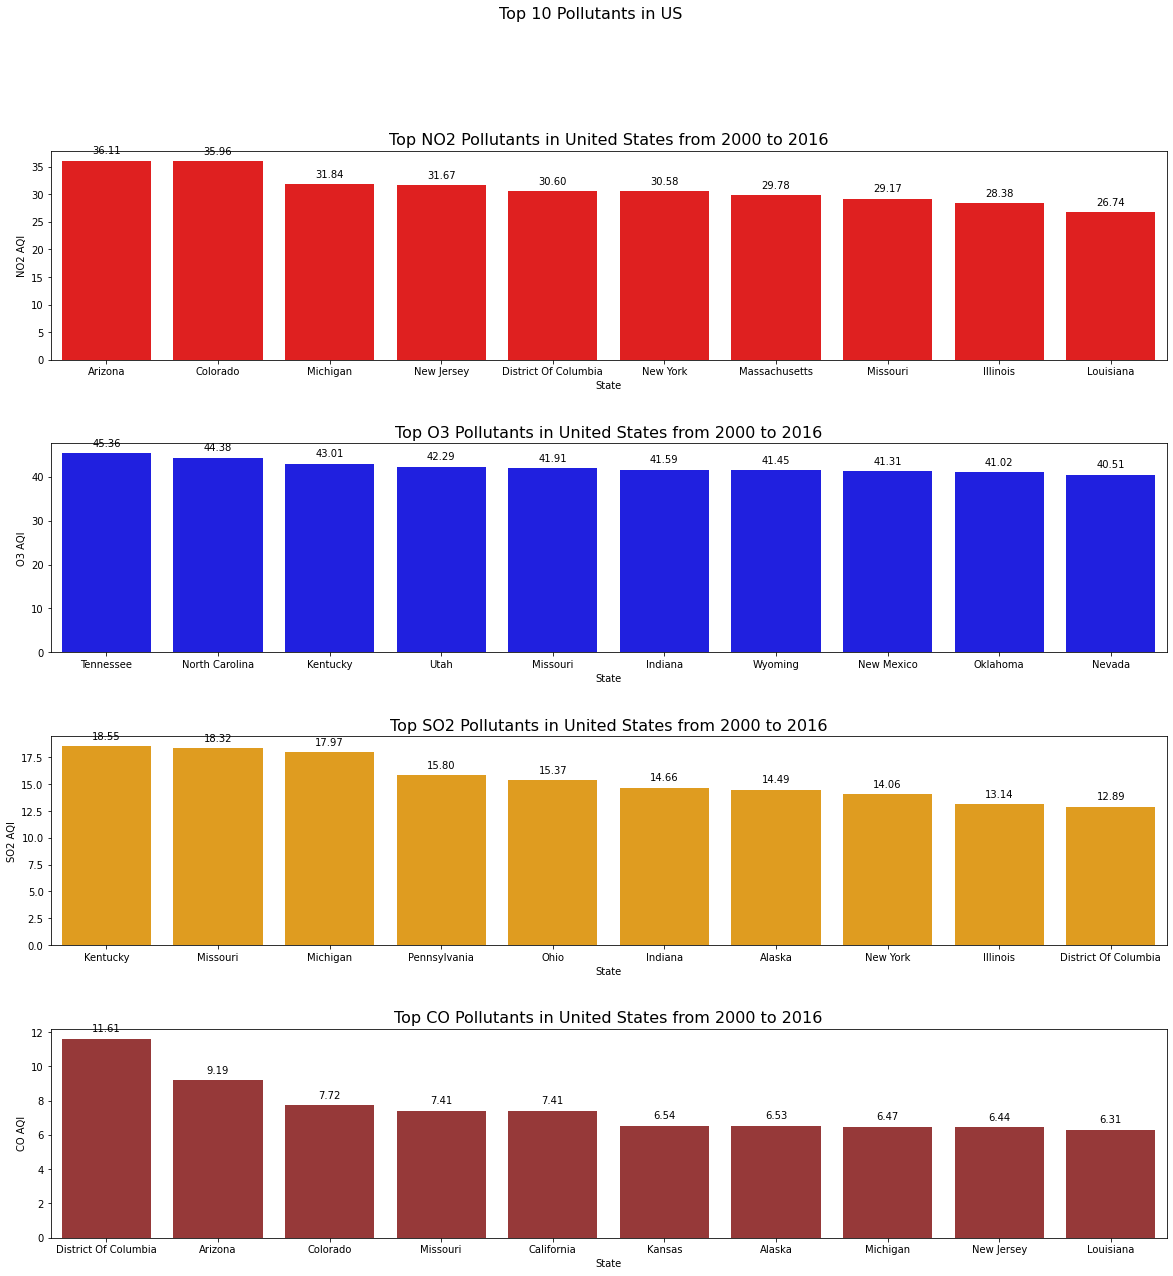

In [70]:


fig, axes = plt.subplots(4, 1, figsize=(20, 20))
fig.suptitle('Top 10 Pollutants in US',fontsize=16)

bplot1=sns.barplot(ax=axes[0], x=topno2['State'], y=topno2['NO2 AQI'],color='red')
for p in bplot1.patches:
    bplot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
axes[0].set_title('Top NO2 Pollutants in United States from 2000 to 2016',fontsize=16)

bplot2=sns.barplot(ax=axes[1], x=topo3['State'], y=topo3['O3 AQI'],color='blue')
for p in bplot2.patches:
    bplot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

axes[1].set_title('Top O3 Pollutants in United States from 2000 to 2016',fontsize=16)

bplot3=sns.barplot(ax=axes[2], x=topso2['State'], y=topso2['SO2 AQI'],color='orange')
for p in bplot3.patches:
    bplot3.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

axes[2].set_title('Top SO2 Pollutants in United States from 2000 to 2016',fontsize=16)

bplot4=sns.barplot(ax=axes[3], x=topco['State'], y=topco['CO AQI'],color='brown')
for p in bplot4.patches:
    bplot4.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

axes[3].set_title('Top CO Pollutants in United States from 2000 to 2016',fontsize=16)

plt.subplots_adjust(hspace = 0.4)



## Spearman's Rank Correlation

In [71]:
rank_df = pd.DataFrame({'Top NO2': ['Arizona', 'Colorado', 'Michigan', 'New Jersey', 'District of Columbia', 'New York', 'Massachusetts', 'Missouri', 'Illinois', 'Louisiana'],
                   'Top O3': ['Tennessee', 'North Carolina', 'Kentucky','Utah', 'Missouri', 'Indiana', 'Wyoming', 'New Mexico', 'Oklahoma', 'Nevada'],
                   'Top SO2': ['Kentucky', 'Missouri', 'Michigan', 'Pennsylvania', 'Ohio', 'Indiana', 'Alaska', 'New York', 'Illinois', 'District of Columbia'],
                    'Top CO':['District of Columbia','Arizona','Colorado','Missouri','California','Kansas','Alaska','Michigan','New Jersey','Louisiana']})


In [72]:
from scipy.stats import spearmanr


rho, p = spearmanr(rank_df['Top NO2'], rank_df['Top O3'])
print('The Spearman rank correlation between Top NO2 and Top O3 is:',rho)
print('The P-value is for Top NO2 and Top O3 is:',p)
print(p<0.05)

print('----------------------------------------------------------------------------------')
print('')

rho, p = spearmanr(rank_df['Top NO2'], rank_df['Top SO2'])
print('The Spearman rank correlation between Top NO2 and Top SO2 is:',rho)
print('The P-value is for Top NO2 and Top SO2 is:',p)
print(p<0.05)

print('----------------------------------------------------------------------------------')
print('')


rho, p = spearmanr(rank_df['Top NO2'], rank_df['Top CO'])
print('The Spearman rank correlation between Top NO2 and Top CO is:',rho)
print('The P-value is for Top NO2 and Top CO is:',p)
print(p<0.05)

print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
print('')


rho, p = spearmanr(rank_df['Top O3'], rank_df['Top NO2'])
print('The Spearman rank correlation between Top O3 and Top NO2 is:',rho)
print('The P-value is for Top O3 and Top NO2 is:',p)
print(p<0.05)

print('----------------------------------------------------------------------------------')
print('')


rho, p = spearmanr(rank_df['Top O3'], rank_df['Top SO2'])
print('The Spearman rank correlation between Top O3 and Top SO2 is:',rho)
print('The P-value is for Top O3 and Top SO2 is:',p)
print(p<0.05)

print('----------------------------------------------------------------------------------')
print('')


rho, p = spearmanr(rank_df['Top O3'], rank_df['Top CO'])
print('The Spearman rank correlation between Top O3 and Top CO is:',rho)
print('The P-value is for Top O3 and Top CO is:',p)
print(p<0.05)

print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
print('')


rho, p = spearmanr(rank_df['Top SO2'], rank_df['Top NO2'])
print('The Spearman rank correlation between Top SO2 and Top NO2 is:',rho)
print('The P-value is for Top SO2 and Top NO2 is:',p)
print(p<0.05)

print('----------------------------------------------------------------------------------')
print('')


rho, p = spearmanr(rank_df['Top SO2'], rank_df['Top O3'])
print('The Spearman rank correlation between Top SO2 and Top O3 is:',rho)
print('The P-value is for Top SO2 and Top O3 is:',p)
print(p<0.05)

print('----------------------------------------------------------------------------------')
print('')


rho, p = spearmanr(rank_df['Top SO2'], rank_df['Top CO'])
print('The Spearman rank correlation between Top SO2 and Top CO is:',rho)
print('The P-value is for Top SO2 and Top CO is:',p)
print(p<0.05)

print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
print('')


rho, p = spearmanr(rank_df['Top CO'], rank_df['Top NO2'])
print('The Spearman rank correlation between Top CO and Top NO2 is:',rho)
print('The P-value is for Top CO and Top NO2 is:',p)
print(p<0.05)

print('----------------------------------------------------------------------------------')
print('')


rho, p = spearmanr(rank_df['Top CO'], rank_df['Top O3'])
print('The Spearman rank correlation between Top CO and Top O3 is:',rho)
print('The P-value is for Top CO and Top O3 is:',p)
print(p<0.05)

print('----------------------------------------------------------------------------------')
print('')


rho, p = spearmanr(rank_df['Top CO'], rank_df['Top SO2'])
print('The Spearman rank correlation between Top CO and Top SO2 is:',rho)
print('The P-value is for Top CO and Top SO2 is:',p)
print(p<0.05)

print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')


The Spearman rank correlation between Top NO2 and Top O3 is: -0.24848484848484845
The P-value is for Top NO2 and Top O3 is: 0.48877630451924314
False
----------------------------------------------------------------------------------

The Spearman rank correlation between Top NO2 and Top SO2 is: 0.09090909090909088
The P-value is for Top NO2 and Top SO2 is: 0.8027717312071619
False
----------------------------------------------------------------------------------

The Spearman rank correlation between Top NO2 and Top CO is: 0.35757575757575755
The P-value is for Top NO2 and Top CO is: 0.3103760917056799
False
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

The Spearman rank correlation between Top O3 and Top NO2 is: -0.24848484848484845
The P-value is for Top O3 and Top NO2 is: 0.48877630451924314
False
----------------------------------------------------------------------------------

The Spearman rank correlation between Top O3 and Top SO2 is: -0.10

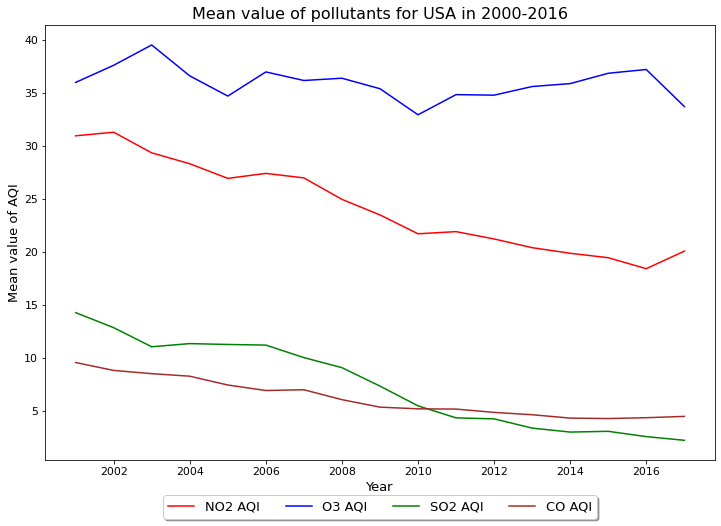

In [73]:
df['Date Local'] = pd.to_datetime(df['Date Local'],format='%Y-%m-%d') 
year_aqi_df = df[['Date Local', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']].resample('Y', on = 'Date Local').mean()
year_aqi_df.reset_index(inplace=True)

# Plot size
plt.rcParams["figure.figsize"] = (12, 8) 

# Adding plots
fig, ax = plt.subplots()
ax.plot('Date Local', 'NO2 AQI', data=year_aqi_df, color = "red", label = "NO2 AQI")
ax.plot('Date Local', 'O3 AQI', data=year_aqi_df, color = "blue", label = "O3 AQI")
ax.plot('Date Local', 'SO2 AQI', data=year_aqi_df, color = "green", label = "SO2 AQI")
ax.plot('Date Local', 'CO AQI', data=year_aqi_df, color = "brown", label = "CO AQI")

# Adding plot title and axis titles
plt.title('Mean value of pollutants for USA in 2000-2016', fontsize = 16)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Mean value of AQI", fontsize = 13)

# change of font size on both axes
ax.tick_params(axis='both', which='major', labelsize=11) 

# Adding legend
ax.legend()
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.15), ncol = 6, shadow = True, fontsize = 13)

**Are Bigger cities or State impacting neighboring cities or States?**

In [74]:
us_states = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [75]:
df = df[df['State']!='Country Of Mexico'] # deleting Mexico
df = df[df['State']!='District Of Columbia'] # deleting Columbia
df['State_abbrevations'] = df.State.apply(lambda x: us_states[x])

In [76]:
df_AQI = df[['State_abbrevations', 'Date Local', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']]
df_AQI_State_Year = df_AQI.groupby('State_abbrevations').resample('Y', on = 'Date Local').mean()
df_AQI_State_Year.reset_index(inplace = True)
df_AQI_State_Year.head(10)

,State_abbrevations,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,AK,2014-12-31,21.167598,15.206704,14.000000,6.983240
1,AK,2015-12-31,18.634340,19.158983,14.764706,6.269841
2,AL,2013-12-31,21.387097,18.903226,6.580645,4.129032
3,AL,2014-12-31,21.495854,36.983416,7.956954,3.711443
4,AL,2015-12-31,20.026667,37.343333,6.950000,3.933333
5,AL,2016-12-31,23.093960,39.295302,5.275168,3.906040
6,AR,2007-12-31,22.887363,34.945055,6.447802,8.390110
7,AR,2008-12-31,19.838798,32.357923,4.527322,6.459016
8,AR,2009-12-31,18.849315,31.690411,4.463014,6.246575
9,AR,2010-12-31,21.809028,36.015278,3.011111,6.486111


In [77]:
# Adding column coresponding to the year of Date Local column
df_AQI_State_Year['Year'] = df_AQI_State_Year['Date Local'].dt.year
# Sorting values by Date Local (for animated choropleth presented below)
df_AQI_State_Year.sort_values(by = 'Date Local', inplace = True)

df_AQI_State_Year

,State_abbrevations,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,Year
33,CA,2000-12-31,29.993446,32.715206,6.045410,11.269346,2000
160,KS,2000-12-31,18.800813,40.173442,5.651762,11.089431,2000
83,FL,2000-12-31,25.573034,39.219101,7.556180,10.342697,2000
319,NJ,2000-12-31,34.641562,31.258020,21.143654,10.005587,2000
16,AZ,2000-12-31,47.117747,39.026735,7.501421,15.164866,2000
...,...,...,...,...,...,...,...
99,FL,2016-12-31,13.857143,36.868132,0.813187,7.406593,2016
82,DE,2016-12-31,25.988095,32.047619,1.952381,4.464286,2016
303,ND,2016-12-31,11.000000,29.417582,0.087912,2.153846,2016
66,CO,2016-12-31,42.159851,31.286245,3.947955,7.843866,2016


In [78]:
import plotly.express as px
fig_NO2 = px.choropleth(df_AQI_State_Year,
              locations = 'State_abbrevations',
              animation_frame="Year", # showing changes through the years
              color='NO2 AQI',
              # Creating fixed scale (the same as defined by EPA)
              color_continuous_scale = [(0.00, "green"),   (0.1, "green"),
                                        (0.1, "yellow"), (0.2, "yellow"),
                                        (0.2, "orange"),  (0.3, "orange"),
                                        (0.3, "red"),  (0.4, "red"),
                                        (0.4, "purple"),  (0.6, "purple"),
                                        (0.6, "maroon"),  (1.00, "maroon"),
                                        ],
              range_color = (0, 500),
              locationmode='USA-states',
              scope="usa",
              title='Mean values of Air Quality Index (AQI) per year for Nitrogen Dioxide (NO2)',
              height=600,
             )

# Modifying legend 
fig_NO2.update_layout(coloraxis_colorbar=dict(
    title="Air Quality Index (AQI)",
    ticks="outside", 
    dtick=50
))


In [79]:
import plotly.express as px
fig_O3 = px.choropleth(df_AQI_State_Year,
              locations = 'State_abbrevations',
              animation_frame="Year", # showing changes through the years
              color='O3 AQI',
              # Creating fixed scale (the same as defined by EPA)
              color_continuous_scale = [(0.00, "green"),   (0.1, "green"),
                                        (0.1, "yellow"), (0.2, "yellow"),
                                        (0.2, "orange"),  (0.3, "orange"),
                                        (0.3, "red"),  (0.4, "red"),
                                        (0.4, "purple"),  (0.6, "purple"),
                                        (0.6, "maroon"),  (1.00, "maroon"),
                                        ],
              range_color = (0, 500),
              locationmode='USA-states',
              scope="usa",
              title='Mean values of Air Quality Index (AQI) per year for Ozone (O3)',
              height=600,
             )

# Modifying legend 
fig_O3.update_layout(coloraxis_colorbar=dict(
    title="Air Quality Index (AQI)",
    ticks="outside", 
    dtick=50
))


In [80]:
import plotly.express as px
fig_SO2 = px.choropleth(df_AQI_State_Year,
              locations = 'State_abbrevations',
              animation_frame="Year", # showing changes through the years
              color='SO2 AQI',
              # Creating fixed scale (the same as defined by EPA)
              color_continuous_scale = [(0.00, "green"),   (0.1, "green"),
                                        (0.1, "yellow"), (0.2, "yellow"),
                                        (0.2, "orange"),  (0.3, "orange"),
                                        (0.3, "red"),  (0.4, "red"),
                                        (0.4, "purple"),  (0.6, "purple"),
                                        (0.6, "maroon"),  (1.00, "maroon"),
                                        ],
              range_color = (0, 500),
              locationmode='USA-states',
              scope="usa",
              title='Mean values of Air Quality Index (AQI) per year for Sulphur Dioxide (SO2)',
              height=600,
             )

# Modifying legend 
fig_SO2.update_layout(coloraxis_colorbar=dict(
    title="Air Quality Index (AQI)",
    ticks="outside", 
    dtick=50
))


In [81]:
import plotly.express as px
fig_CO = px.choropleth(df_AQI_State_Year,
              locations = 'State_abbrevations',
              animation_frame="Year", # showing changes through the years
              color='CO AQI',
              # Creating fixed scale (the same as defined by EPA)
              color_continuous_scale = [(0.00, "green"),   (0.1, "green"),
                                        (0.1, "yellow"), (0.2, "yellow"),
                                        (0.2, "orange"),  (0.3, "orange"),
                                        (0.3, "red"),  (0.4, "red"),
                                        (0.4, "purple"),  (0.6, "purple"),
                                        (0.6, "maroon"),  (1.00, "maroon"),
                                        ],
              range_color = (0, 500),
              locationmode='USA-states',
              scope="usa",
              title='Mean values of Air Quality Index (AQI) per year for Carbon Monooxide (CO)',
              height=600,
             )

# Modifying legend 
fig_CO.update_layout(coloraxis_colorbar=dict(
    title="Air Quality Index (AQI)",
    ticks="outside", 
    dtick=50
))


In [82]:
# Calculating daily mean value of pollutants for every State
df_AQI_State_Month = df_AQI.groupby('State_abbrevations').resample('D', on = 'Date Local').mean()
df_AQI_State_Month.reset_index(inplace = True)

# Adding columns coresponding to the day, month and year of Date Local column
df_AQI_State_Month['Day'] = df_AQI_State_Month['Date Local'].dt.day
df_AQI_State_Month['Month'] = df_AQI_State_Month['Date Local'].dt.month
df_AQI_State_Month['Year'] = df_AQI_State_Month['Date Local'].dt.year

# Data for July in 2005
df_AQI_State_2005_July = df_AQI_State_Month[(df_AQI_State_Month['Year'] == 2005) & (df_AQI_State_Month['Month'] == 7)]

# Sorting values by Date Local (for animated choropleth presented below)
df_AQI_State_2005_July.sort_values(by = 'Date Local', inplace = True)

In [83]:
fig_O3_v2 = px.choropleth(df_AQI_State_2005_July,
              locations = 'State_abbrevations',
              animation_frame="Day", # showing changes through the days
              color='O3 AQI',
              # Creating fixed scale (the same as defined by EPA)
              color_continuous_scale = [(0.00, "green"),   (0.1, "green"),
                                        (0.1, "yellow"), (0.2, "yellow"),
                                        (0.2, "orange"),  (0.3, "orange"),
                                        (0.3, "red"),  (0.4, "red"),
                                        (0.4, "purple"),  (0.6, "purple"),
                                        (0.6, "maroon"),  (1.00, "maroon"),
                                        ],
              range_color = (0, 500),
              locationmode='USA-states',
              scope="usa",
              title='Mean values of Air Quality Index (AQI) per day for Ozone (O3) for July 2005',
              height=600,
             )

# Modifying legend 
fig_O3_v2.update_layout(coloraxis_colorbar=dict(
    title="Air Quality Index (AQI)",
    ticks="outside", 
    dtick=50
))

## Clusteirng based on Cities

In [84]:
df = pd.read_csv('../input/airpollution/AirPollution_Cleaned.csv')
dff = pd.read_csv('../input/uspollution/pollution_us_2000_2016.csv')


In [85]:
df['Date Local'] = dff['Date Local']
df.head(10)

,State,County,City,Lat,Long,county_fips,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,...,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,33.5722,-112.0891,4013.0,2000-01-01,19.041667,49.0,19,...,10,34,3.000000,9.0,21,13,0.878947,2.2,23,25
1,Arizona,Maricopa,Phoenix,33.5722,-112.0891,4013.0,2000-01-01,22.958333,36.0,19,...,10,27,1.958333,3.0,22,4,1.066667,2.3,0,26
2,Arizona,Maricopa,Phoenix,33.5722,-112.0891,4013.0,2000-01-01,38.125000,51.0,8,...,9,14,5.250000,11.0,19,16,1.762500,2.5,8,28
3,Arizona,Maricopa,Phoenix,33.5722,-112.0891,4013.0,2000-01-01,40.260870,74.0,8,...,9,28,7.083333,16.0,8,23,1.829167,3.0,23,34
4,Arizona,Maricopa,Phoenix,33.5722,-112.0891,4013.0,2000-01-02,48.450000,61.0,22,...,9,10,8.708333,15.0,7,21,2.700000,3.7,2,42
5,Arizona,Maricopa,Phoenix,33.5722,-112.0891,4013.0,2000-01-02,39.950000,73.0,8,...,10,21,6.761905,17.0,7,24,2.308333,3.6,9,41
6,Arizona,Maricopa,Phoenix,33.5722,-112.0891,4013.0,2000-01-02,29.625000,43.0,9,...,10,20,8.666667,21.0,7,30,1.829167,3.5,23,40
7,Arizona,Maricopa,Phoenix,33.5722,-112.0891,4013.0,2000-01-02,29.666667,41.0,0,...,10,17,8.250000,18.0,0,26,2.787500,5.1,2,57
8,Arizona,Maricopa,Phoenix,33.5722,-112.0891,4013.0,2000-01-03,25.083333,37.0,20,...,10,19,6.500000,13.0,19,19,1.675000,2.8,2,32
9,Arizona,Maricopa,Phoenix,33.5722,-112.0891,4013.0,2000-01-03,37.666667,70.0,20,...,9,13,9.958333,21.0,20,30,2.179167,3.7,23,42


In [86]:
df.isnull().sum()

State                    0
County                   0
City                     0
Lat                  62208
Long                 62208
county_fips          62208
Date Local               0
NO2 Mean                 0
NO2 1st Max Value        0
NO2 1st Max Hour         0
NO2 AQI                  0
O3 Mean                  0
O3 1st Max Value         0
O3 1st Max Hour          0
O3 AQI                   0
SO2 Mean                 0
SO2 1st Max Value        0
SO2 1st Max Hour         0
SO2 AQI                  0
CO Mean                  0
CO 1st Max Value         0
CO 1st Max Hour          0
CO AQI                   0
dtype: int64

In [87]:
df = df.dropna(axis=0)
df = df.drop_duplicates()
data_no_duplindex_col=0
df.head(10)
df.isnull().sum()

State                0
County               0
City                 0
Lat                  0
Long                 0
county_fips          0
Date Local           0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64

In [88]:
df_city_aqi = df[['City','NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']]
df_city_aqi_clust = df_city_aqi.groupby('City').mean()
df_city_aqi_clust.reset_index(inplace = True)
df_city_aqi_clust.head(10)

,City,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,Albuquerque,24.465286,41.327548,1.179171,3.479843
1,Alexandria,27.141593,41.183118,10.456093,4.066712
2,Altoona,20.689182,41.873879,18.290237,2.381003
3,Annandale,25.223762,38.143564,13.996040,5.929703
4,Arden-Arcade,20.502720,40.651018,2.655249,7.315736
5,Ashland,25.641355,51.026869,22.033879,2.785047
6,Athens,8.713656,37.810573,16.903084,3.718062
7,Austin,12.482505,36.979742,1.005525,1.674033
8,Bakersfield,51.972222,30.388889,8.675926,16.074074
9,Baton Rouge,26.815189,33.931082,11.405966,6.232642


In [89]:
clust = df_city_aqi_clust['City']
df_city_aqi_clust.drop('City',axis=1,inplace=True)


In [90]:
clust = pd.DataFrame(clust)
df_city_aqi_clust

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,24.465286,41.327548,1.179171,3.479843
1,27.141593,41.183118,10.456093,4.066712
2,20.689182,41.873879,18.290237,2.381003
3,25.223762,38.143564,13.996040,5.929703
4,20.502720,40.651018,2.655249,7.315736
...,...,...,...,...
126,20.847247,40.291297,11.394316,3.133215
127,21.557756,35.410341,2.828383,3.839384
128,24.020619,56.657732,21.744330,6.826804
129,16.900754,35.743058,2.445492,6.301680


In [91]:
from sklearn.cluster import KMeans
distortions = []

K = range(1,11)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 500)
    kmean.fit(df_city_aqi_clust)
    distortions.append(kmean.inertia_)

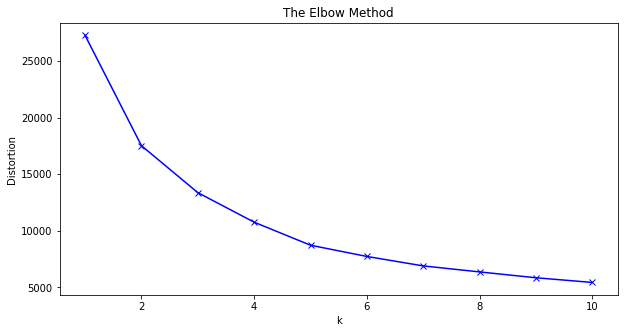

In [92]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [93]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_city_aqi_clust)

clust['cluster'] = kmeans.labels_
clust

,City,cluster
0,Albuquerque,2
1,Alexandria,0
2,Altoona,0
3,Annandale,0
4,Arden-Arcade,2
...,...,...
126,Wilkes-Barre,0
127,Wilmington,2
128,Winston-Salem,0
129,Winter Park,1


In [94]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_city_aqi_clust)
pca_types = pca.transform(df_city_aqi_clust)
print("Variance explained by each component (%): ")
for i in range(len(pca.explained_variance_ratio_)):
      print("\n",i+1,"º:", pca.explained_variance_ratio_[i]*100)
print("Total sum (%): ",sum(pca.explained_variance_ratio_)*100)
print("Explained variance of the first two components (%): ",sum(pca.explained_variance_ratio_[0:1])*100)

Variance explained by each component (%): 

 1 º: 53.39476102984951

 2 º: 28.237158705263514

 3 º: 16.821086767658425

 4 º: 1.5469934972285435
Total sum (%):  100.0
Explained variance of the first two components (%):  53.39476102984951


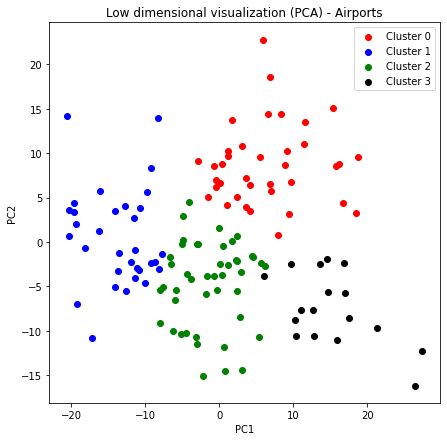

In [95]:
c0 = []
c1 = []
c2 = []
c3 = []

for i in range(len(pca_types)):
    if kmeans.labels_[i] == 0:
        c0.append(pca_types[i])
    if kmeans.labels_[i] == 1:
        c1.append(pca_types[i])
    if kmeans.labels_[i] == 2:
        c2.append(pca_types[i])
    if kmeans.labels_[i] == 3:
        c3.append(pca_types[i])
        
        
c0 = np.array(c0)
c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)

plt.figure(figsize=(7,7))
plt.scatter(c0[:,0], c0[:,1], c='red', label='Cluster 0')
plt.scatter(c1[:,0], c1[:,1], c='blue', label='Cluster 1')
plt.scatter(c2[:,0], c2[:,1], c='green', label='Cluster 2')
plt.scatter(c3[:,0], c3[:,1], c='black', label='Cluster 3')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Low dimensional visualization (PCA) - Airports');


In [96]:
df_city_aqi_clust['cluster']  = kmeans.labels_

df_city_aqi_clust

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,cluster
0,24.465286,41.327548,1.179171,3.479843,2
1,27.141593,41.183118,10.456093,4.066712,0
2,20.689182,41.873879,18.290237,2.381003,0
3,25.223762,38.143564,13.996040,5.929703,0
4,20.502720,40.651018,2.655249,7.315736,2
...,...,...,...,...,...
126,20.847247,40.291297,11.394316,3.133215,0
127,21.557756,35.410341,2.828383,3.839384,2
128,24.020619,56.657732,21.744330,6.826804,0
129,16.900754,35.743058,2.445492,6.301680,1


In [97]:
df_city_aqi_clust.groupby('cluster').mean()


,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
cluster,,,,
0,26.776370,42.937038,16.856816,5.278978
1,11.119071,37.664116,3.053821,2.693343
2,23.109782,33.013493,5.535504,5.528695
3,38.981175,31.928172,9.163323,10.716688


In [98]:
df_city_aqi_clust['City'] = clust['City']

In [99]:
import folium # plotting library
from folium import plugins

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

In [100]:
latitude = 38.500000
longitude = -95.665

map_USA = folium.Map(location=[latitude, longitude], zoom_start=4)

map_USA

In [101]:
df = df[df['State']!='Country Of Mexico'] # deleting Mexico
df = df[df['State']!='District Of Columbia'] # deleting Columbia
df['State_abbrevations'] = df.State.apply(lambda x: us_states[x])
df.head()

,State,County,City,Lat,Long,county_fips,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,...,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,State_abbrevations
0,Arizona,Maricopa,Phoenix,33.5722,-112.0891,4013.0,2000-01-01,19.041667,49.0,19,...,34,3.000000,9.0,21,13,0.878947,2.2,23,25,AZ
1,Arizona,Maricopa,Phoenix,33.5722,-112.0891,4013.0,2000-01-01,22.958333,36.0,19,...,27,1.958333,3.0,22,4,1.066667,2.3,0,26,AZ
2,Arizona,Maricopa,Phoenix,33.5722,-112.0891,4013.0,2000-01-01,38.125000,51.0,8,...,14,5.250000,11.0,19,16,1.762500,2.5,8,28,AZ
3,Arizona,Maricopa,Phoenix,33.5722,-112.0891,4013.0,2000-01-01,40.260870,74.0,8,...,28,7.083333,16.0,8,23,1.829167,3.0,23,34,AZ
4,Arizona,Maricopa,Phoenix,33.5722,-112.0891,4013.0,2000-01-02,48.450000,61.0,22,...,10,8.708333,15.0,7,21,2.700000,3.7,2,42,AZ


In [102]:
folium_df = df[['City','Lat','Long','county_fips','State','NO2 AQI']]
folium_df['State_abbrevations'] = folium_df.State.apply(lambda x: us_states[x])
# folium_df = folium_df.groupby(['City'],as_index=False).mean()
folium_df = folium_df.merge(df_city_aqi_clust)
print(type(folium_df))
folium_df
# result = pd.concat([df_city_aqi_clust,folium_df],axis=1)
# folium_df.to_csv('withcluster.csv')

<class 'pandas.core.frame.DataFrame'>


,City,Lat,Long,county_fips,State,NO2 AQI,State_abbrevations,O3 AQI,SO2 AQI,CO AQI,cluster


In [103]:
foliumdf = pd.read_csv('../input/airpollution/withcluster.csv')

In [104]:
foliumdf.drop('Unnamed: 0',axis=1)

,City,State,Lat,Long,county_fips,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,cluster
0,Alexandria,VA,38.8185,-77.0861,51510,27.141593,41.183118,10.456093,4.066712,0
1,Altoona,PA,40.5082,-78.4007,42013,20.689182,41.873879,18.290237,2.381003,0
2,Annandale,VA,38.8324,-77.1960,51059,25.223762,38.143564,13.996040,5.929703,0
3,Arden-Arcade,CA,38.6034,-121.3810,6067,20.502720,40.651018,2.655249,7.315736,2
4,Ashland,KY,38.4592,-82.6449,6001,25.641355,51.026869,22.033879,2.785047,0
...,...,...,...,...,...,...,...,...,...,...
124,Wilkes-Barre,PA,41.2468,-75.8759,42079,20.847247,40.291297,11.394316,3.133215,0
125,Wilmington,DE,39.7390,-75.5397,37129,21.557756,35.410341,2.828383,3.839384,2
126,Winston-Salem,NC,36.1029,-80.2611,37067,24.020619,56.657732,21.744330,6.826804,0
127,Winter Park,FL,28.5987,-81.3438,12095,16.900754,35.743058,2.445492,6.301680,1


In [105]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, cluster, city, state in zip(foliumdf['Lat'], foliumdf['Long'],  
                                            foliumdf['cluster'],
                                         foliumdf['City'],
                                         foliumdf['State']):
    #label = folium.Popup(str(city)+ ','+str(state) + '- Cluster ' + str(cluster), parse_html=True)
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        tooltip = str(city)+ ','+str(state) + '- Cluster ' + str(cluster),
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

## SARIMAX FOR SEASONAL FORECASTING

In [106]:
df = pd.read_csv('../input/uspollution/pollution_us_2000_2016.csv')


In [107]:
sari_df = df[['Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
sari_df = sari_df.groupby('Date Local').mean()
sari_df.index = pd.to_datetime(sari_df.index)
sari_df

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
Date Local,,,,
2000-01-01,32.307692,23.974359,13.384615,16.000000
2000-01-02,27.184211,26.973684,11.315789,11.342105
2000-01-03,37.233766,19.038961,11.454545,16.131579
2000-01-04,38.650000,18.150000,10.125000,18.050000
2000-01-05,38.700000,21.675000,11.375000,17.775000
...,...,...,...,...
2016-05-27,7.857143,39.000000,0.142857,2.142857
2016-05-28,9.857143,43.571429,0.428571,2.571429
2016-05-29,20.000000,42.142857,3.857143,3.571429


In [108]:
from statsmodels.tsa.seasonal import seasonal_decompose
no2_decompose = seasonal_decompose(sari_df['NO2 AQI'], model='additive', freq=365)
o3_decompose = seasonal_decompose(sari_df['O3 AQI'], model='additive', freq=365)
so2_decompose = seasonal_decompose(sari_df['SO2 AQI'], model='additive', freq=365)
co_decompose = seasonal_decompose(sari_df['CO AQI'], model='additive', freq=365)

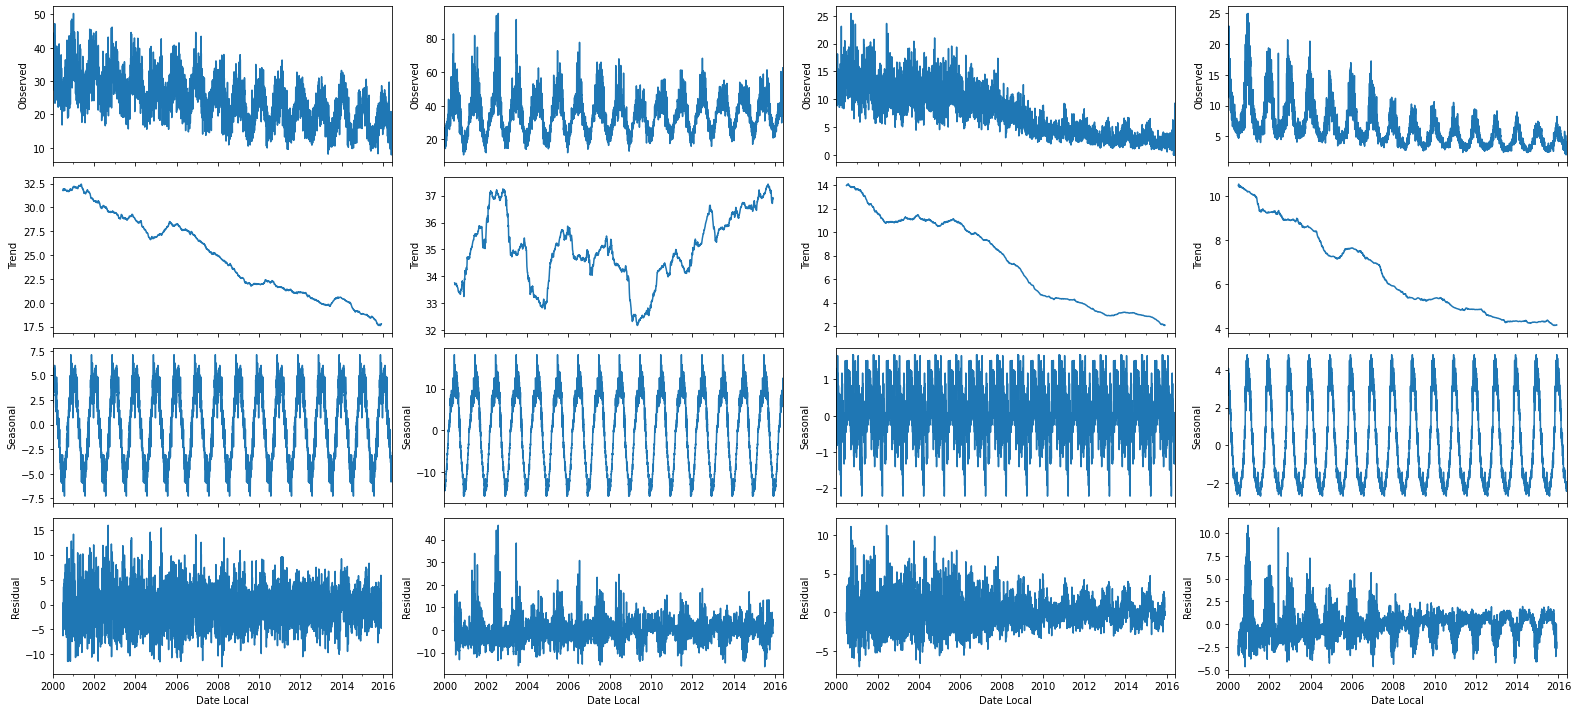

In [109]:

def plotseasonal(no2_decompose, axes ):
    no2_decompose.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    no2_decompose.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    no2_decompose.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    no2_decompose.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

fig, axes = plt.subplots(ncols=4, nrows=4, sharex=True, figsize=(22,10))
plotseasonal(no2_decompose, axes[:,0])
plotseasonal(o3_decompose, axes[:,1])
plotseasonal(so2_decompose, axes[:,2])
plotseasonal(co_decompose, axes[:,3])

plt.tight_layout()
plt.show()

In [110]:
data_monthwise = df[['Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
data_monthwise['Date Local'] = pd.to_datetime(data_monthwise['Date Local'],format='%Y-%m-%d') 
data_monthwise['Day'] = data_monthwise['Date Local'].dt.day
data_monthwise['Month'] = data_monthwise['Date Local'].dt.month
data_monthwise['Year'] = data_monthwise['Date Local'].dt.year

# Data for July in 2005
data_monthwise = data_monthwise[(data_monthwise['Day'] == 1)]

In [111]:
data_o3 = data_monthwise[['Date Local','O3 AQI']]
data_o3 = data_o3.groupby('Date Local').mean()
data_o3.index = pd.to_datetime(data_o3.index)
data_o3

,O3 AQI
Date Local,
2000-01-01,23.974359
2000-02-01,22.047059
2000-03-01,29.600000
2000-04-01,39.616438
2000-05-01,55.716216
...,...
2016-01-01,27.864407
2016-02-01,30.269231
2016-03-01,36.740741


In [112]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 657 kB/s 


In [113]:
import pandas as pd
import numpy as np
%matplotlib inline
import plotly.graph_objs as go
from  plotly.offline import plot
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot,plot_mpl
init_notebook_mode(connected='true')
data_o3.iplot(title="O3 Pollutant values from 2000 to 2016")

In [114]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [115]:
test_result=adfuller(data_o3['O3 AQI'])

In [116]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(o3):
    result=adfuller(o3)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [117]:
adfuller_test(data_o3['O3 AQI'])

ADF Test Statistic : -3.42119100630304
p-value : 0.010257338104166815
#Lags Used : 10
Number of Observations Used : 186
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [118]:
data_o3['O3 AQI First Difference'] = data_o3['O3 AQI'] - data_o3['O3 AQI'].shift(1)
data_o3['O3 AQI Seasonal First Difference']=data_o3['O3 AQI']-data_o3['O3 AQI'].shift(12)

In [119]:
data_o3['forecast'] = ""


In [120]:
## Again test dickey fuller test
adfuller_test(data_o3['O3 AQI Seasonal First Difference'].dropna())

ADF Test Statistic : -4.913776534027936
p-value : 3.2783778499825254e-05
#Lags Used : 11
Number of Observations Used : 173
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [121]:
data_o3['O3 AQI Seasonal First Difference'].iplot()

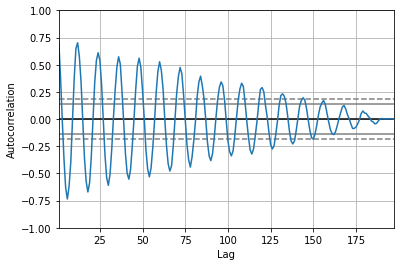

In [122]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_o3['O3 AQI'])
plt.show()

In [123]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [124]:
import statsmodels.api as sm

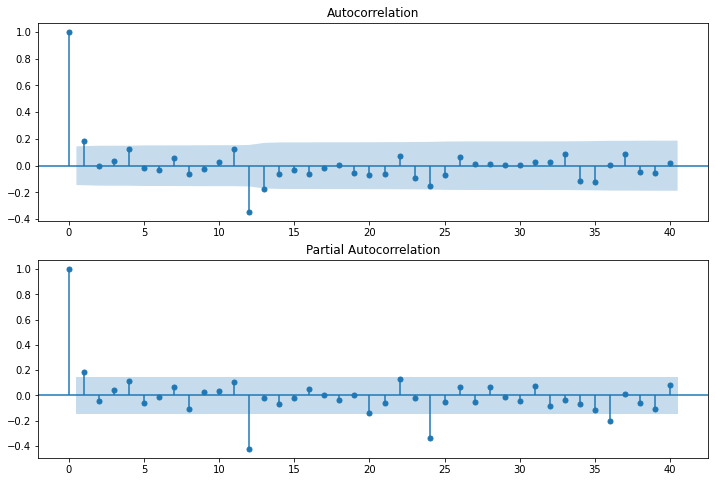

In [125]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_o3['O3 AQI Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_o3['O3 AQI Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [126]:
#p = 1; q= 0 or 1; d =1 as we dif one seasonal idfference
from statsmodels.tsa.arima_model import ARIMA

In [127]:
model=ARIMA(data_o3['O3 AQI'],order=(1,1,0))
model_fit=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57171D+00    |proj g|=  1.35048D-04

At iterate    5    f=  3.57171D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      7      1     0     0   4.441D-08   3.572D+00
  F =   3.5717084903794221     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

 This problem is unconstrained.


<AxesSubplot:xlabel='Date Local'>

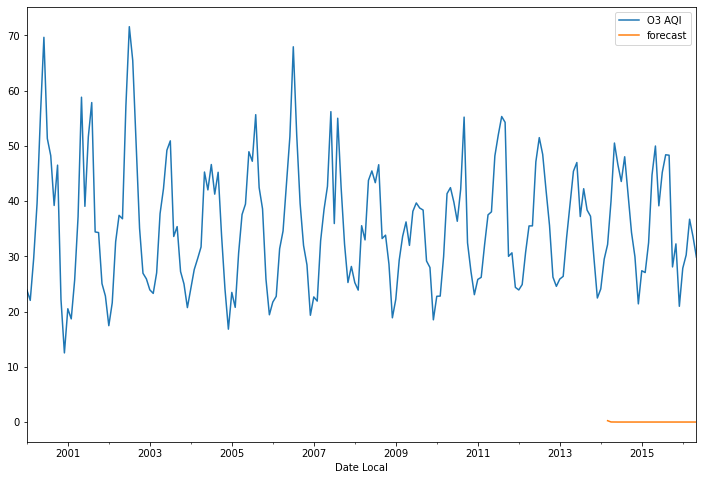

In [128]:
data_o3['forecast']=model_fit.predict(start=170,end=200,dynamic=True)
data_o3[['O3 AQI','forecast']].plot(figsize=(12,8))

In [129]:
import statsmodels.api as sm

In [130]:
model=sm.tsa.statespace.SARIMAX(data_o3['O3 AQI'],order=(1, 1, 0),seasonal_order=(1,1,1,12))
results=model.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24060D+00    |proj g|=  7.11666D-02

At iterate    5    f=  3.17535D+00    |proj g|=  2.21190D-02

At iterate   10    f=  3.16659D+00    |proj g|=  3.62312D-02

At iterate   15    f=  3.16511D+00    |proj g|=  1.51602D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     21      1     0     0   5.127D-06   3.165D+00
  F =   3.1651064515882461     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<AxesSubplot:xlabel='Date Local'>

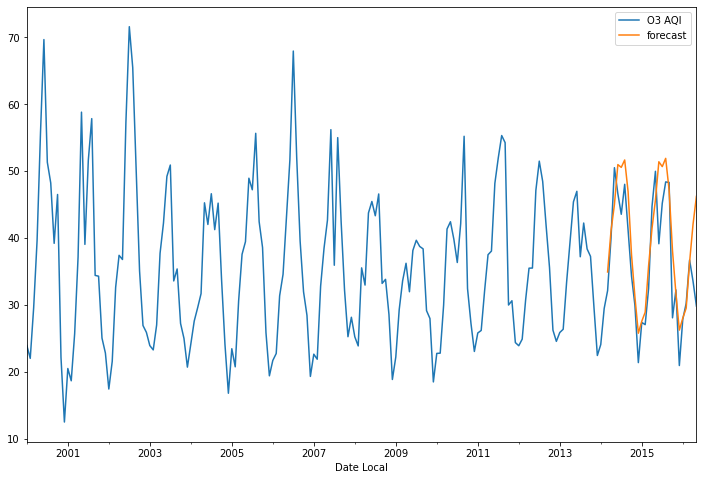

In [131]:
# data_o3['forecast']=model_fit.predict(start=170,end=200,dynamic=True)
# data_o3[['O3 AQI','forecast']].plot(figsize=(12,8))

data_o3['forecast']=results.predict(start=170,end=200,dynamic=True)
data_o3[['O3 AQI','forecast']].plot(figsize=(12,8))

In [132]:
from pandas.tseries.offsets import DateOffset
pred_date=[data_o3.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [133]:
pred_date=pd.DataFrame(index=pred_date[1:],columns=data_o3.columns)
pred_date

,O3 AQI,O3 AQI First Difference,O3 AQI Seasonal First Difference,forecast
2016-06-01,NaN,NaN,NaN,NaN
2016-07-01,NaN,NaN,NaN,NaN
2016-08-01,NaN,NaN,NaN,NaN
2016-09-01,NaN,NaN,NaN,NaN
2016-10-01,NaN,NaN,NaN,NaN
2016-11-01,NaN,NaN,NaN,NaN
2016-12-01,NaN,NaN,NaN,NaN
2017-01-01,NaN,NaN,NaN,NaN
2017-02-01,NaN,NaN,NaN,NaN
2017-03-01,NaN,NaN,NaN,NaN


In [134]:
data_o3=pd.concat([data_o3,pred_date])

<AxesSubplot:>

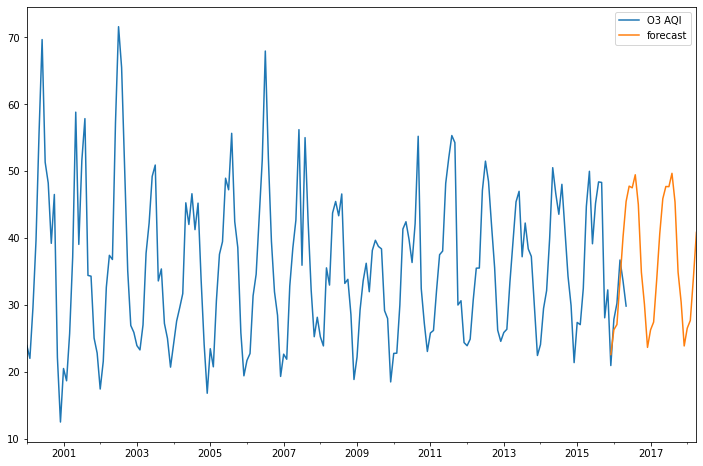

In [135]:
data_o3['forecast']=results.predict(start=191,end=270,dynamic=True)
data_o3[['O3 AQI','forecast']].plot(figsize=(12,8))

In [136]:
data = data_monthwise[['Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
data = data.groupby('Date Local').mean()
data.index = pd.to_datetime(data.index)
data

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
Date Local,,,,
2000-01-01,32.307692,23.974359,13.384615,16.000000
2000-02-01,36.741176,22.047059,11.882353,14.976744
2000-03-01,35.357895,29.600000,10.736842,12.104167
2000-04-01,39.575342,39.616438,23.109589,11.534247
2000-05-01,37.000000,55.716216,16.756757,8.932432
...,...,...,...,...
2016-01-01,16.288136,27.864407,0.983051,4.169492
2016-02-01,21.500000,30.269231,2.730769,4.307692
2016-03-01,21.851852,36.740741,1.814815,4.944444


In [137]:
from statsmodels.tsa.seasonal import seasonal_decompose
no2_decompose = seasonal_decompose(data['NO2 AQI'], model='additive', freq=12)
o3_decompose = seasonal_decompose(data['O3 AQI'], model='additive', freq=12)
so2_decompose = seasonal_decompose(data['SO2 AQI'], model='additive', freq=12)
co_decompose = seasonal_decompose(data['CO AQI'], model='additive', freq=12)

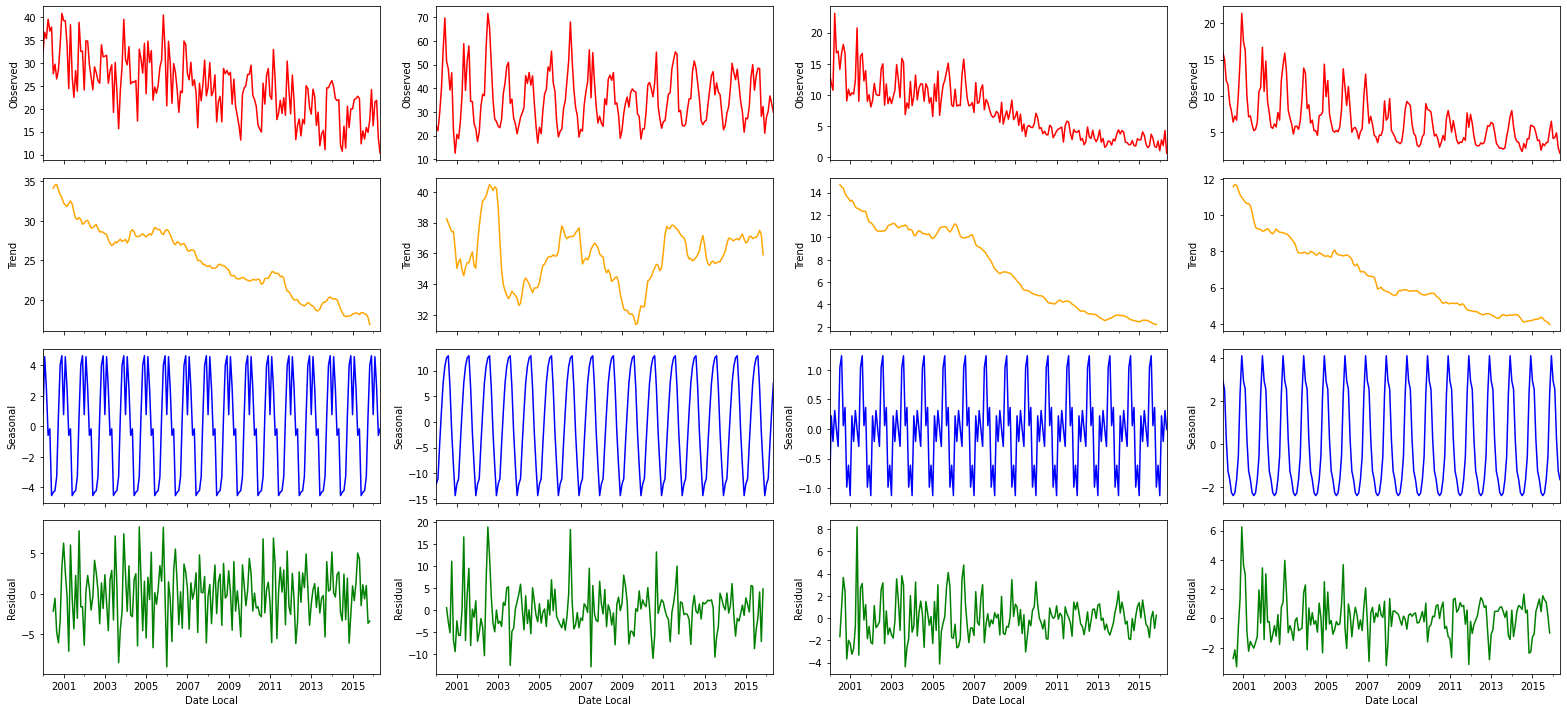

In [138]:

def plotseasonal(no2_decompose, axes ):
    no2_decompose.observed.plot(ax=axes[0], legend=False,color='Red')
    axes[0].set_ylabel('Observed')
    no2_decompose.trend.plot(ax=axes[1], legend=False,color='Orange')
    axes[1].set_ylabel('Trend')
    no2_decompose.seasonal.plot(ax=axes[2], legend=False,color='Blue')
    axes[2].set_ylabel('Seasonal')
    no2_decompose.resid.plot(ax=axes[3], legend=False,color='Green')
    axes[3].set_ylabel('Residual')

fig, axes = plt.subplots(ncols=4, nrows=4, sharex=True, figsize=(22,10))
plotseasonal(no2_decompose, axes[:,0])
plotseasonal(o3_decompose, axes[:,1])
plotseasonal(so2_decompose, axes[:,2])
plotseasonal(co_decompose, axes[:,3])


plt.tight_layout()
plt.show()

## Multivariate Regression


In [139]:
df = pd.read_csv('./AirPollution_Cleaned.csv')

In [140]:
df.head()

,Unnamed: 0,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,...,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,...,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
1,5,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,...,10,27,1.958333,3.0,22,4.0,1.066667,2.3,0,26.0
2,9,Arizona,Maricopa,Phoenix,2000-01-03,38.125000,51.0,8,48,0.007958,...,9,14,5.250000,11.0,19,16.0,1.762500,2.5,8,28.0
3,13,Arizona,Maricopa,Phoenix,2000-01-04,40.260870,74.0,8,72,0.014167,...,9,28,7.083333,16.0,8,23.0,1.829167,3.0,23,34.0
4,17,Arizona,Maricopa,Phoenix,2000-01-05,48.450000,61.0,22,58,0.006667,...,9,10,8.708333,15.0,7,21.0,2.700000,3.7,2,42.0


In [141]:
df = df[['NO2 Mean','NO2 1st Max Value','NO2 1st Max Hour','NO2 AQI','O3 Mean','O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']]

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error , mean_absolute_error , r2_score
from sklearn.model_selection import train_test_split

y = df['NO2 AQI']

r2_score_list = []
explained_variance_list = []
mean_squared_error_list = []

In [143]:
def sub_lists(l):
    lists = []
    for i in range(len(l) + 1):
        for j in range(i):
            lists.append(l[j: i])
    return lists

In [144]:
def lin_regress(x):
    lin_reg = LinearRegression()
    for i in x:
        X_train,X_test,y_train,y_test = train_test_split(df[i],y,test_size=0.2,random_state=42)
        lin_reg.fit(X_train,y_train)
        y_pred = lin_reg.predict(X_test)
        r2_score_list.append(explained_variance_score(y_test,y_pred))
        explained_variance_list.append(r2_score(y_test,y_pred))
        mean_squared_error_list.append(mean_squared_error(y_test,y_pred))

In [145]:
reg_lists = sub_lists(['NO2 Mean','NO2 1st Max Value','NO2 1st Max Hour','O3 Mean','O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'])

In [146]:
lin_regress(reg_lists)

In [147]:
df_metrics = pd.DataFrame(list(zip(reg_lists,r2_score_list, explained_variance_list, mean_squared_error_list)),columns =['Attribute', 'r2_score','explained_variance','mean_squared_error'])

In [148]:
df_metrics

,Attribute,r2_score,explained_variance,mean_squared_error
0,[NO2 Mean],0.820189,0.820183,41.410730
1,"[NO2 Mean, NO2 1st Max Value]",0.995919,0.995919,0.939779
2,[NO2 1st Max Value],0.995873,0.995873,0.950449
3,"[NO2 Mean, NO2 1st Max Value, NO2 1st Max Hour]",0.995919,0.995919,0.939764
4,"[NO2 1st Max Value, NO2 1st Max Hour]",0.995873,0.995873,0.950334
...,...,...,...,...
115,"[SO2 AQI, CO Mean, CO 1st Max Value, CO 1st Ma...",0.446517,0.446516,127.464149
116,"[CO Mean, CO 1st Max Value, CO 1st Max Hour, C...",0.413286,0.413285,135.117052
117,"[CO 1st Max Value, CO 1st Max Hour, CO AQI]",0.413117,0.413115,135.156092
118,"[CO 1st Max Hour, CO AQI]",0.406247,0.406244,136.738356


In [149]:
df_metrics.to_csv('df_metrics.csv')

In [150]:
df_metrics.sort_values(["r2_score", "mean_squared_error"], ascending = (False, True))

,Attribute,r2_score,explained_variance,mean_squared_error
105,"[NO2 Mean, NO2 1st Max Value, NO2 1st Max Hour...",0.995964,0.995964,0.929524
91,"[NO2 Mean, NO2 1st Max Value, NO2 1st Max Hour...",0.995963,0.995963,0.929631
78,"[NO2 Mean, NO2 1st Max Value, NO2 1st Max Hour...",0.995961,0.995961,0.930102
66,"[NO2 Mean, NO2 1st Max Value, NO2 1st Max Hour...",0.995960,0.995960,0.930488
55,"[NO2 Mean, NO2 1st Max Value, NO2 1st Max Hour...",0.995948,0.995948,0.933039
...,...,...,...,...
26,"[O3 1st Max Hour, O3 AQI]",0.002783,0.002747,229.661396
27,[O3 AQI],0.002494,0.002458,229.728018
19,"[O3 1st Max Value, O3 1st Max Hour]",0.000472,0.000435,230.193765
20,[O3 1st Max Hour],0.000376,0.000339,230.215833


In [151]:
print('NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI is the one set of attributes which gives the best regression with highest R-squared value of 0.995964 and least Mean Squared Error of 0.929524')

NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI is the one set of attributes which gives the best regression with highest R-squared value of 0.995964 and least Mean Squared Error of 0.929524
